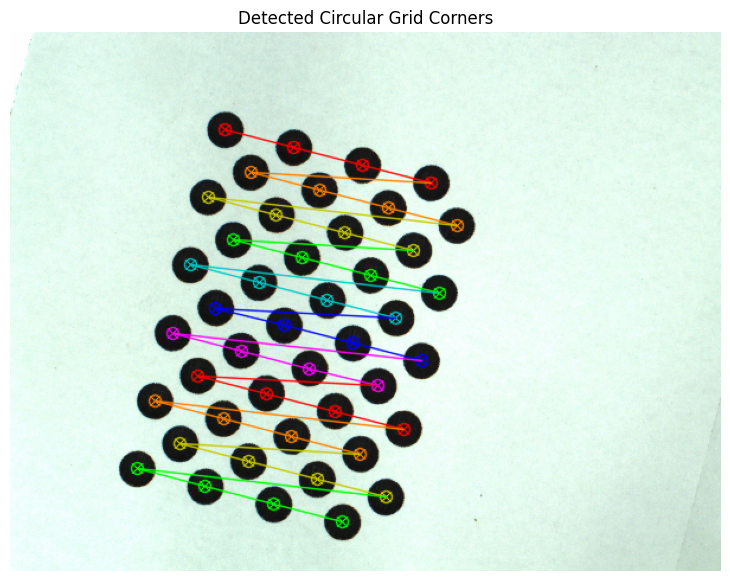

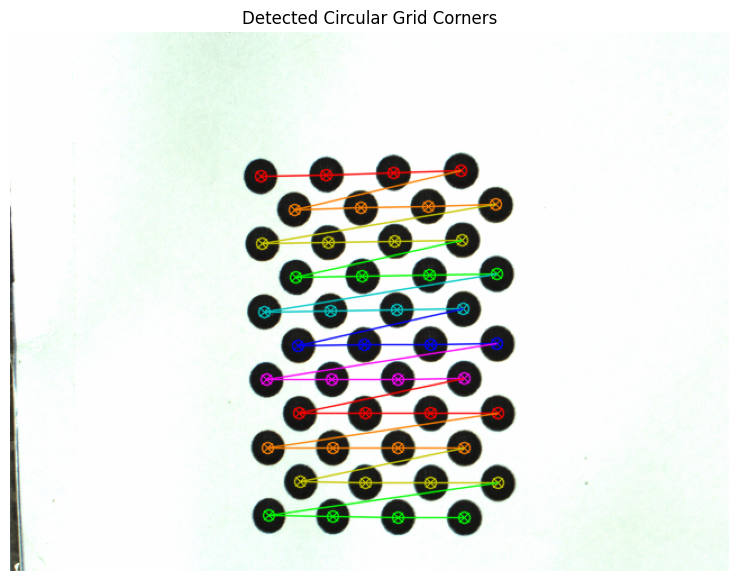

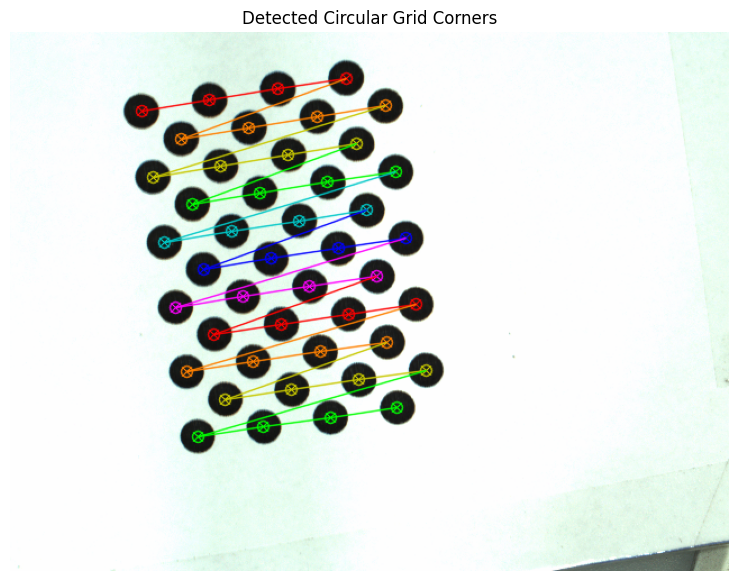

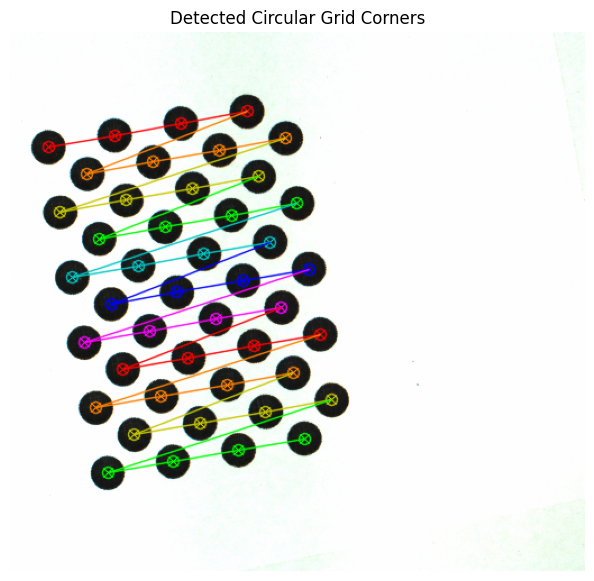

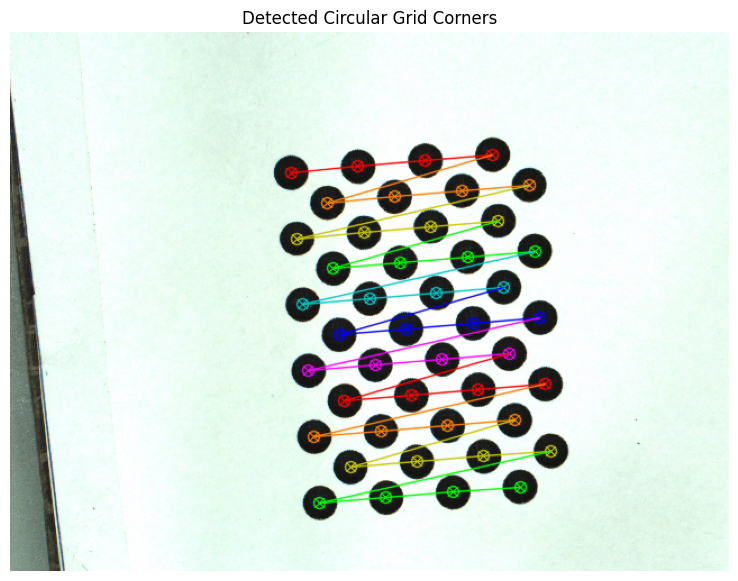

Error in projection : 
 0.28397138983144454

Camera matrix : 
 [[ 2.98018921e+03  0.00000000e+00 -2.07790654e+02]
 [ 0.00000000e+00  2.98680284e+03  5.80328425e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Distortion coefficients : 
 [[-1.38990856e+00  1.28121439e+01 -1.76642505e-02  4.92392883e-02
  -6.65051152e+01]]

Rotation vector : 
 (array([[1.98945526],
       [2.57035289],
       [0.00544979]]), array([[-1.89996745],
       [-1.89926952],
       [ 0.33507546]]), array([[-2.14337583],
       [-1.80887688],
       [-0.09635143]]), array([[-2.30654667],
       [-1.91925375],
       [-0.09466171]]), array([[-2.14159899],
       [-1.96709245],
       [ 0.1071076 ]]))

Translation vector : 
 (array([[ 465.62346672],
       [-601.35083923],
       [3539.69438033]]), array([[ 505.52037482],
       [-533.9294019 ],
       [3465.5424648 ]]), array([[ 379.75108105],
       [-604.77742563],
       [3469.4559751 ]]), array([[ 286.79705362],
       [-575.92280139],
       [3538.1

In [1]:
# imports
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Real world coordinates of circular grid
obj3d = np.zeros((44, 3), np.float32)
# As the actual circle size is not required,
# the z-coordinate is zero and the x and y coordinates are random numbers.
a = [0, 36, 72, 108, 144, 180, 216, 252, 288, 324, 360]
b = [0, 72, 144, 216, 36, 108, 180, 252]
for i in range(0, 44):
    obj3d[i] = (a[i // 4], (b[i % 8]), 0)

# Vector to store 3D points
obj_points = []
# Vector to store 2D points
img_points = []

# Extracting path of individual images stored in a given directory
images = glob.glob('/Users/sivaprasanth/Documents/Computer Vision/Computer-Vision/img/cimages/*.png')

for f in images:
    # Loading image
    img = cv.imread(f)
    # Conversion to grayscale image
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # To find the position of circles in the grid pattern
    ret, corners = cv.findCirclesGrid(gray, (4, 11), None, flags=cv.CALIB_CB_ASYMMETRIC_GRID)

    # If true is returned, then 3D and 2D vector points are updated and corner is drawn on image
    if ret == True:
        obj_points.append(obj3d)
        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        img_points.append(corners2)

        # Drawing the corners on the image
        cv.drawChessboardCorners(img, (4, 11), corners2, ret)

        # Convert BGR to RGB for Matplotlib
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        # Display the image with corners using Matplotlib
        plt.figure(figsize=(10, 7))
        plt.imshow(img_rgb)
        plt.title('Detected Circular Grid Corners')
        plt.axis('off')
        plt.show()

# Camera calibration: 
# Passing the value of known 3D points (obj_points) and the corresponding pixel coordinates 
# of the detected corners (img_points)
ret, camera_mat, distortion, rotation_vecs, translation_vecs = cv.calibrateCamera(
    obj_points, img_points, gray.shape[::-1], None, None)

print("Error in projection : \n", ret)
print("\nCamera matrix : \n", camera_mat)
print("\nDistortion coefficients : \n", distortion)
print("\nRotation vector : \n", rotation_vecs)
print("\nTranslation vector : \n", translation_vecs)